The Click through Prediction is a binary classification Problem.
THe following methods Logistic Regression, Random Forest, Gradient Boosting are used to predict 
the probabilities wheather an ad is clicked or not 

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# importing data files

In [2]:
data = pd.read_csv('./sampled_training.txt',header=None)

In [3]:
test = pd.read_csv('./sampled_test.txt',header=None)

In [5]:
data.shape

(843502, 24)

In [7]:
data.describe()

,0,1,2,3,4,14,15,16,17,18,19,20,21,22,23
count,8.435020e+05,843502.000000,8.435020e+05,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000
mean,9.231625e+18,0.170271,1.410250e+07,1004.959553,0.293501,1.016934,0.330417,18560.262501,318.861537,60.286297,2077.663483,1.443956,217.741979,54155.776171,79.551913
std,5.325619e+18,0.375871,2.684486e+02,1.132949,0.515961,0.553377,0.854515,5007.778987,21.730624,47.965820,610.749820,1.323114,342.722108,49887.241496,66.999613
min,1.308118e+13,0.000000,1.410210e+07,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000
25%,4.622961e+18,0.000000,1.410222e+07,1005.000000,0.000000,1.000000,0.000000,16688.000000,320.000000,50.000000,1800.000000,0.000000,35.000000,-1.000000,23.000000
50%,9.238306e+18,0.000000,1.410251e+07,1005.000000,0.000000,1.000000,0.000000,20108.000000,320.000000,50.000000,2295.000000,2.000000,39.000000,100057.000000,52.000000
75%,1.384568e+19,0.000000,1.410272e+07,1005.000000,1.000000,1.000000,0.000000,21768.000000,320.000000,50.000000,2506.000000,3.000000,167.000000,100084.000000,91.000000
max,1.844669e+19,1.000000,1.410300e+07,1012.000000,7.000000,5.000000,5.000000,23836.000000,1024.000000,1024.000000,2729.000000,3.000000,1839.000000,100248.000000,253.000000


In [8]:
columns=['id','click','hour','C1','banner_pos','site_id','site_domain','site_category',
         'app_id','app_domain','app_category','device_id','device_ip',
         'device_model','device_type','device_conn_type','C14','C15','C16','C17','C18','C19','C20','C21']

testcolumns=['id','hour','C1','banner_pos','site_id','site_domain','site_category',
         'app_id','app_domain','app_category','device_id','device_ip',
         'device_model','device_type','device_conn_type','C14','C15','C16','C17','C18','C19','C20','C21']

In [15]:
data.columns=columns


In [16]:
test.columns=testcolumns

# Exploratory Data Analysis

# Counts of clicks

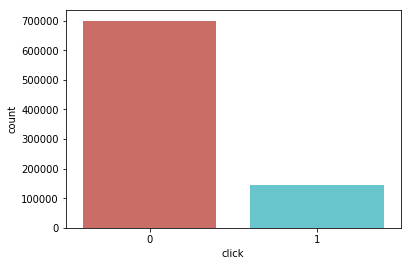

In [42]:

sns.countplot(x='click',data=data, palette='hls')
plt.show();

Here 0 is denoted as nonclick and 1 is denotes click

In [43]:
data['hour'] = pd.to_datetime(data['hour'], format='%y%m%d%H')

# Number of Clicks by Hour

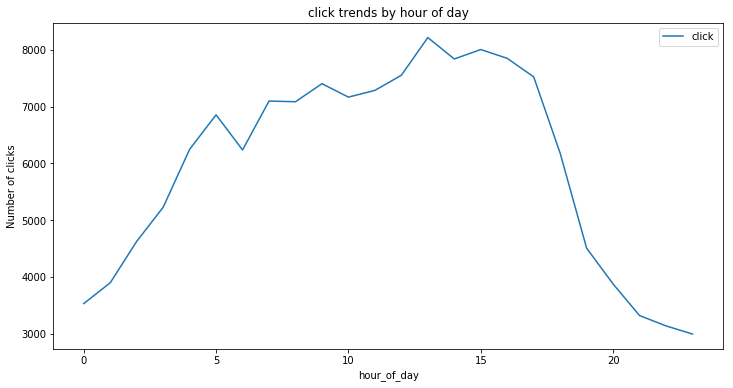

In [91]:
data['hour_of_day'] = data.hour.apply(lambda x: x.hour)
data.groupby('hour_of_day').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('click trends by hour of day');

As we can see the most number of clicks are done durin the noon period 

# Impressions Vs Clicks

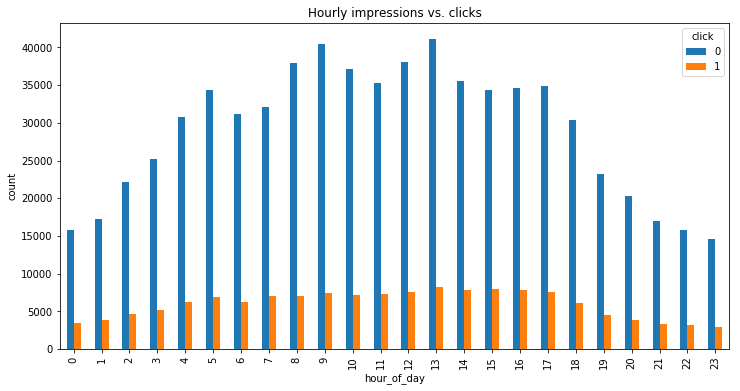

In [46]:
data.groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks');

# Hourly CTR Rate

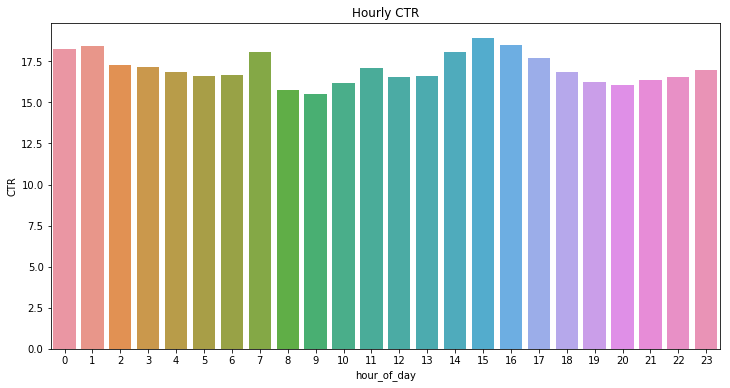

In [47]:
import seaborn as sns
df_click = data[data['click'] == 1]
df_hour = data[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()
df_hour = df_hour.rename(columns={'click': 'impressions'})
df_hour['clicks'] = df_click[['hour_of_day','click']].groupby(['hour_of_day']).count().reset_index()['click']
df_hour['CTR'] = df_hour['clicks']/df_hour['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='hour_of_day', data=df_hour)
plt.title('Hourly CTR');

# Click Trends by Day of the Week

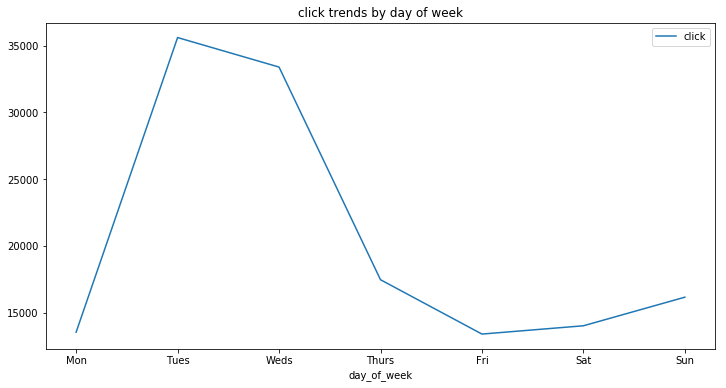

In [48]:
data['day_of_week'] = data['hour'].apply(lambda val: val.weekday_name)
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data.groupby('day_of_week').agg({'click':'sum'}).reindex(cats).plot(figsize=(12,6))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels)
plt.title('click trends by day of week');

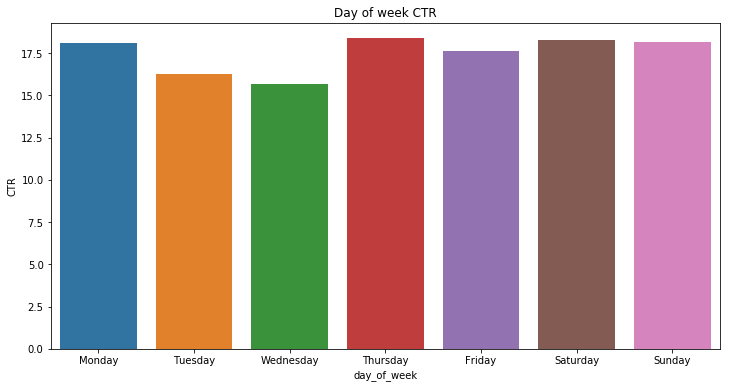

In [49]:
df_click = data[data['click'] == 1]
df_dayofweek = data[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()
df_dayofweek = df_dayofweek.rename(columns={'click': 'impressions'})
df_dayofweek['clicks'] = df_click[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()['click']
df_dayofweek['CTR'] = df_dayofweek['clicks']/df_dayofweek['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='day_of_week', data=df_dayofweek, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day of week CTR');

As we can see from the plot that Tuesday and Wednesday have a least ctr compared to other week days.

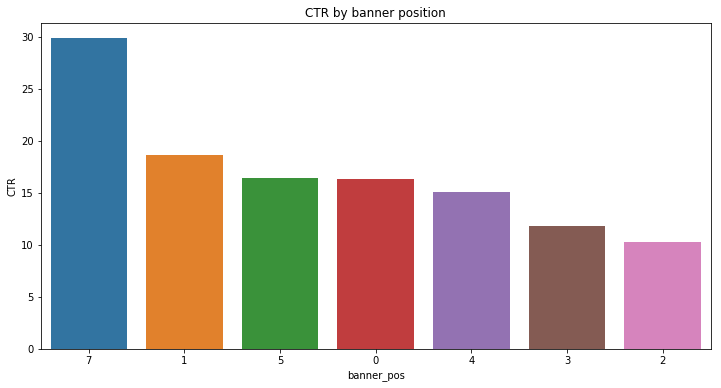

In [50]:
df_banner = data[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()
df_banner = df_banner.rename(columns={'click': 'impressions'})
df_banner['clicks'] = df_click[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()['click']
df_banner['CTR'] = df_banner['clicks']/df_banner['impressions']*100
sort_banners = df_banner.sort_values(by='CTR',ascending=False)['banner_pos'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='banner_pos', data=df_banner, order=sort_banners)
plt.title('CTR by banner position');

In [51]:
device_type_click = df_click.groupby('device_type').agg({'click':'sum'}).reset_index()
device_type_impression = data.groupby('device_type').agg({'click':'count'}).reset_index().rename(columns={'click': 'impressions'})
merged_device_type = pd.merge(left = device_type_click , right = device_type_impression, how = 'inner', on = 'device_type')
merged_device_type['CTR'] = merged_device_type['click'] / merged_device_type['impressions']*100
merged_device_type

,device_type,click,impressions,CTR
0,0,10834,50958,21.260646
1,1,130900,771785,16.960682
2,4,1654,17794,9.295268
3,5,236,2965,7.959528


# Data Pre-processing

In [10]:
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(n_features=50, input_type='string')
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

All the categorical variables are converted into one hot encoders, 
Then feature hashing is performed to reduce the dimensions into a dense vector.

In [ ]:
train_fh = pd.DataFrame(fh.fit_transform(data[['site_id','site_domain','site_category',
         'app_id','app_domain','app_category','device_id','device_ip'
         ]].values).toarray())


test_fh=pd.DataFrame(fh.fit_transform(test[['site_id','site_domain','site_category',
         'app_id','app_domain','app_category','device_id','device_ip'
         ]].values).toarray())

In [11]:

ohe = OneHotEncoder()
train_ohe = pd.DataFrame(ohe.fit_transform(
                              data[['banner_pos','device_conn_type']]).toarray())

test_ohe = pd.DataFrame(ohe.transform(
                              test[['banner_pos','device_conn_type']]).toarray())



In [12]:
train_ft=pd.concat([train_fh,train_ohe],axis=1)
test_ft=pd.concat([test_fh,test_ohe],axis=1)

In [ ]:
Y = data['click']

# Data Splitting

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_ft, Y, shuffle = True, random_state = 0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

# Data Modelling

# Logistic regression

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
ypredl=logreg.predict(X_test)

In [84]:
confusion_matrix(y_test,ypredl)
roc_auc_score(y_test,ypredl)

0.500251354570748

# RandomForest Classifier

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [52]:
#from dask.diagnostics import ProgressBar

clf = RandomForestClassifier(n_estimators=15, max_depth=20,
                         random_state=0)
clf.fit(X_train,y_train)
ypredrf=clf.predict(X_test)

In [53]:
roc_auc_score(y_test,ypred)

# Gradient boosting classifier

In [72]:


from  sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(n_estimators=20,max_depth=5,learning_rate=0.5,random_state=0)

In [73]:
gbrt.fit(X_train,y_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=20,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [77]:
ypredgb=gbrt.predict(X_test)

In [79]:
roc_auc_score(y_test,ypredgb)

0.509915015552471

Out of all the models the best model is Gradient boosting Classifier from the auc_roc metric. 


In [88]:
# write predictions using gradient boosting model

predictions=pd.DataFrame(gbrt.predict_proba(test_ft))

In [92]:

preddf=pd.concat([test['id'],predictions],axis=1)

In [93]:
preddf.to_csv('./Predictions.csv', sep=',', encoding='utf-8')